## Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

**Observaciones**: 
El data frame contiene información separada por :: y por ||  

Datos que contiene:  

· Índice  
· Nombre de Película  
· Año de la película  
· Género de película (en este caso existen varios generlos para una misma película)

## Preprocesado y adecuación del dataframe

In [53]:
#cargamos las librerías que vamos a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Ruta del archivo
#ruta_archivo = 'C:\\Users\\vsanc\\OneDrive\\Escritorio\\CIBERNARIUM\\DataScience\\Sprint4\\movies.dat'

# Para cargar el archivo .dat y dividir en columnas

#with open(ruta_archivo, 'r', encoding='latin1') as file:
    #lines = file.readlines()
#Abre el archivo en modo lectura ('r') y utiliza el encoding 'latin1' para leer caracteres especiales. 
#Usar with asegura que el archivo se cierre automáticamente al finalizar el bloque de código.

In [55]:
df_movies = pd.read_csv('./movies.dat', sep='::', encoding='latin1', engine='python')
df_movies

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


### 1. Añadimos título a las columnas.

1. Como no tenemos encabezado en las columnas, lo que vamos a realizar a continuación es añadir los títulos.

In [56]:
df_movies.columns = ['Indice', 'película', 'género']

In [57]:
df_movies.head()

,Indice,película,género
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


### 2. Eliminamos el índice.

In [58]:
#Añadimos en movies.dat la primera fila; indice::pelicula::genero, para poder eliminar el indice.
df_movies = df_movies.drop(['Indice'], axis=1)

df_movies.columns

Index(['película', 'género'], dtype='object')

In [59]:
df_movies

,película,género
0,Jumanji (1995),Adventure|Children's|Fantasy
1,Grumpier Old Men (1995),Comedy|Romance
2,Waiting to Exhale (1995),Comedy|Drama
3,Father of the Bride Part II (1995),Comedy
4,Heat (1995),Action|Crime|Thriller
...,...,...
3877,Meet the Parents (2000),Comedy
3878,Requiem for a Dream (2000),Drama
3879,Tigerland (2000),Drama
3880,Two Family House (2000),Drama


### 2. Dividimos la columna de pelicula, quitando el año y generando una nueva columna. 

In [60]:
# Para ello seleccionamos las posiciones por detrás que coinciden con lo que queremos añadir a la nueva columna.
df_movies['año'] = df_movies.película.str.slice(-5,-1)
df_movies['película'] = df_movies.película.str.slice(0,-6)

df_movies.head(10)

,película,género,año
0,Jumanji,Adventure|Children's|Fantasy,1995
1,Grumpier Old Men,Comedy|Romance,1995
2,Waiting to Exhale,Comedy|Drama,1995
3,Father of the Bride Part II,Comedy,1995
4,Heat,Action|Crime|Thriller,1995
5,Sabrina,Comedy|Romance,1995
6,Tom and Huck,Adventure|Children's,1995
7,Sudden Death,Action,1995
8,GoldenEye,Action|Adventure|Thriller,1995
9,"American President, The",Comedy|Drama|Romance,1995


### 3. Reordenar los valores género, para que cada género tenga su propia fila.

1. Primero vamos a utliziar el siguiente código para eliminar la separación '|'.

In [61]:
df_movies['género'] = df_movies.género.str.split('|')
df_movies.head()

,película,género,año
0,Jumanji,"[Adventure, Children's, Fantasy]",1995
1,Grumpier Old Men,"[Comedy, Romance]",1995
2,Waiting to Exhale,"[Comedy, Drama]",1995
3,Father of the Bride Part II,[Comedy],1995
4,Heat,"[Action, Crime, Thriller]",1995


2. Reordenamos los generos para que cada película tenga una fila con un único genero.

In [62]:
df_movies['género'] = df_movies.género.str[0].str.strip()
df_movies.head(10)

,película,género,año
0,Jumanji,Adventure,1995
1,Grumpier Old Men,Comedy,1995
2,Waiting to Exhale,Comedy,1995
3,Father of the Bride Part II,Comedy,1995
4,Heat,Action,1995
5,Sabrina,Comedy,1995
6,Tom and Huck,Adventure,1995
7,Sudden Death,Action,1995
8,GoldenEye,Action,1995
9,"American President, The",Comedy,1995


### 4. Reordenamos las columnas.

In [63]:
col = df_movies.pop('año')
df_movies.insert(loc= 1 , column= 'año', value= col)
df_movies

,película,año,género
0,Jumanji,1995,Adventure
1,Grumpier Old Men,1995,Comedy
2,Waiting to Exhale,1995,Comedy
3,Father of the Bride Part II,1995,Comedy
4,Heat,1995,Action
...,...,...,...
3877,Meet the Parents,2000,Comedy
3878,Requiem for a Dream,2000,Drama
3879,Tigerland,2000,Drama
3880,Two Family House,2000,Drama


# Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

1. Quiero saber el número de películas de cada año según su género.

Está gráfica nos muestra dónde se concentra el mayor volumen de películas según su género, podemos observar que aquellos géneros que acumulan más "puntos", que son las "anomalias", son los géneros comedia, drama, romance y Thriller, que aunque el mayor volumen esté en los años 80, 90 los años 20 y 70 encontramos películas de ese género. Un dato interesante.  
En cambio, nos llama especialmente la atención el género Fantasy que hasta los años 80 no se han empezado a producir, películas de este tipo. Está claro que Science - Fiction y War (guerra) son los géneros que más se han generado a lo largo de todos estos años.

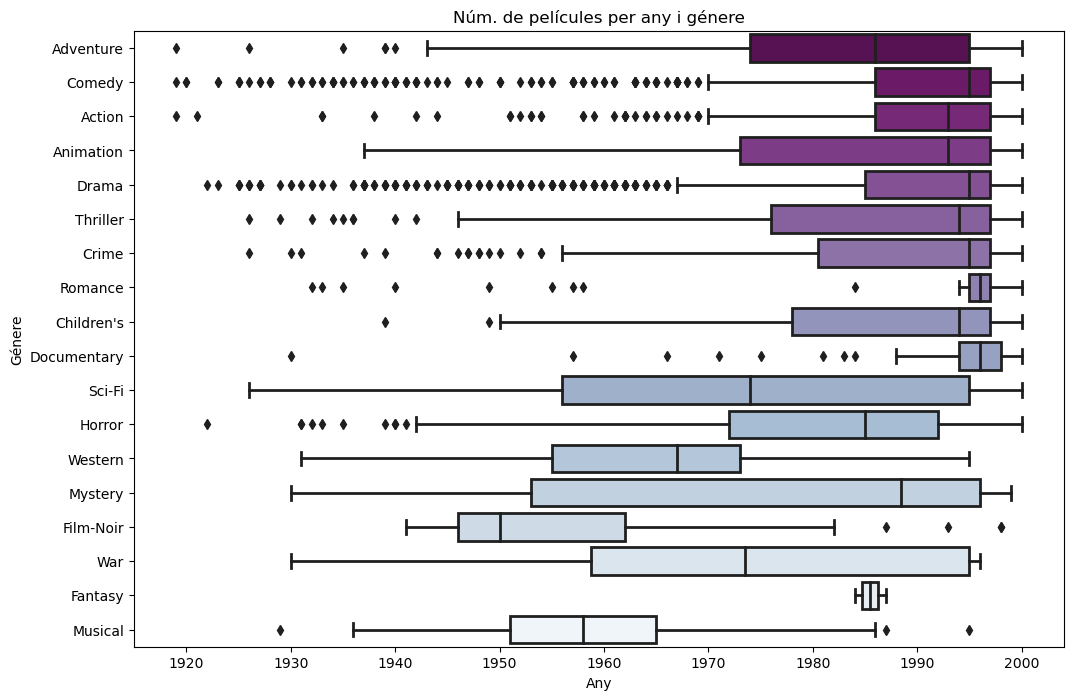

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminamos filas que tengan años NaN 
df_movies = df_movies.dropna(subset=['año'])

# Convertimos la columna 'año' a tipo numérico, para que pueda contabilizar.
df_movies['año'] = pd.to_numeric(df_movies['año'])

# Creamos un boxplot con seaborn ajustando los parámetros
plt.figure(figsize=(12, 8))
sns.boxplot(x='año', y='género', data=df_movies, linewidth=2, palette='BuPu_r')
plt.title('Núm. de películes per any i génere')
plt.xlabel('Any')
plt.ylabel('Génere')
plt.show()